In [30]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris

In [2]:
#Loading the iris data
data = load_iris()

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
data.data.shape

(150, 4)

In [5]:
print('Classes to predict: ', data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [6]:
print('Features: ', data.feature_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
#First four rows from the dataset.
data.data[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [8]:
data.target[:4]

array([0, 0, 0, 0])

In [9]:
# Extracting data attributes / features
X = data.data

# Extracting target/ class labels
y = data.target

In [10]:
#Shape of the dataset
display(X.shape, y.shape)

(150, 4)

(150,)

In [11]:
# Import library for splitting the dataset into train and test.
from sklearn.model_selection import train_test_split

In [12]:
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = 0.25)

In [13]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [15]:
#prediction
y_pred = clf.predict(X_test)

In [16]:
#Importing the accuracy metric from sklearn.metrics library
from sklearn.metrics import accuracy_score

In [17]:
print('Accuracy Score on train data (using Default criterionas gini): ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data (using Default criterionas gini): ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data (using Default criterionas gini):  1.0
Accuracy Score on test data (using Default criterionas gini):  0.9473684210526315


In [18]:
# Changing the Criterion to Entropy
clf_entropy = DecisionTreeClassifier(criterion = 'entropy')

In [19]:
#Training the decision tree classifier. 
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
#Predicting labels on the test set.
y_pred_entropy =  clf_entropy.predict(X_test)

In [21]:
print('Accuracy Score on train data (using Default criterion as Entropy): ', accuracy_score(y_true=y_train, y_pred =clf_entropy.predict(X_train)))
print('Accuracy Score on test data (using Default criterion as Entropy): ', accuracy_score(y_true=y_test, y_pred =y_pred_entropy))

Accuracy Score on train data (using Default criterion as Entropy):  1.0
Accuracy Score on test data (using Default criterion as Entropy):  0.9473684210526315


In [22]:
# After tune the parameters of the decision tree to increase its accuracy
clf2 = DecisionTreeClassifier( min_samples_split=50)
clf2.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_split=50)

In [23]:
print('Accuracy Score on train data (using Default criterion as Entropy & min_samples_split): ', accuracy_score(y_true=y_train, y_pred=clf2.predict(X_train)))
print('Accuracy Score on the test data (using Default criterion as Entropy & min_samples_split): ', accuracy_score(y_true=y_test, y_pred=clf2.predict(X_test)))

Accuracy Score on train data (using Default criterion as Entropy & min_samples_split):  0.9642857142857143
Accuracy Score on the test data (using Default criterion as Entropy & min_samples_split):  0.9473684210526315


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 

In [25]:
cm

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 11]], dtype=int64)

# Visualize the Tree

In [26]:
!pip install pydotplus

[Text(535.6800000000001, 684.9359999999999, 'X[2] <= 2.6\ngini = 0.666\nsamples = 112\nvalue = [39, 35, 38]'),
 Text(401.76000000000005, 532.728, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(669.6000000000001, 532.728, 'X[3] <= 1.65\ngini = 0.499\nsamples = 73\nvalue = [0, 35, 38]'),
 Text(267.84000000000003, 380.52, 'X[2] <= 5.0\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(133.92000000000002, 228.312, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(401.76000000000005, 228.312, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(267.84000000000003, 76.10399999999993, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(535.6800000000001, 76.10399999999993, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(1071.3600000000001, 380.52, 'X[2] <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(937.44, 228.312, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(803.5200000000001, 76.10399999999993, 'gini = 0.0\ns

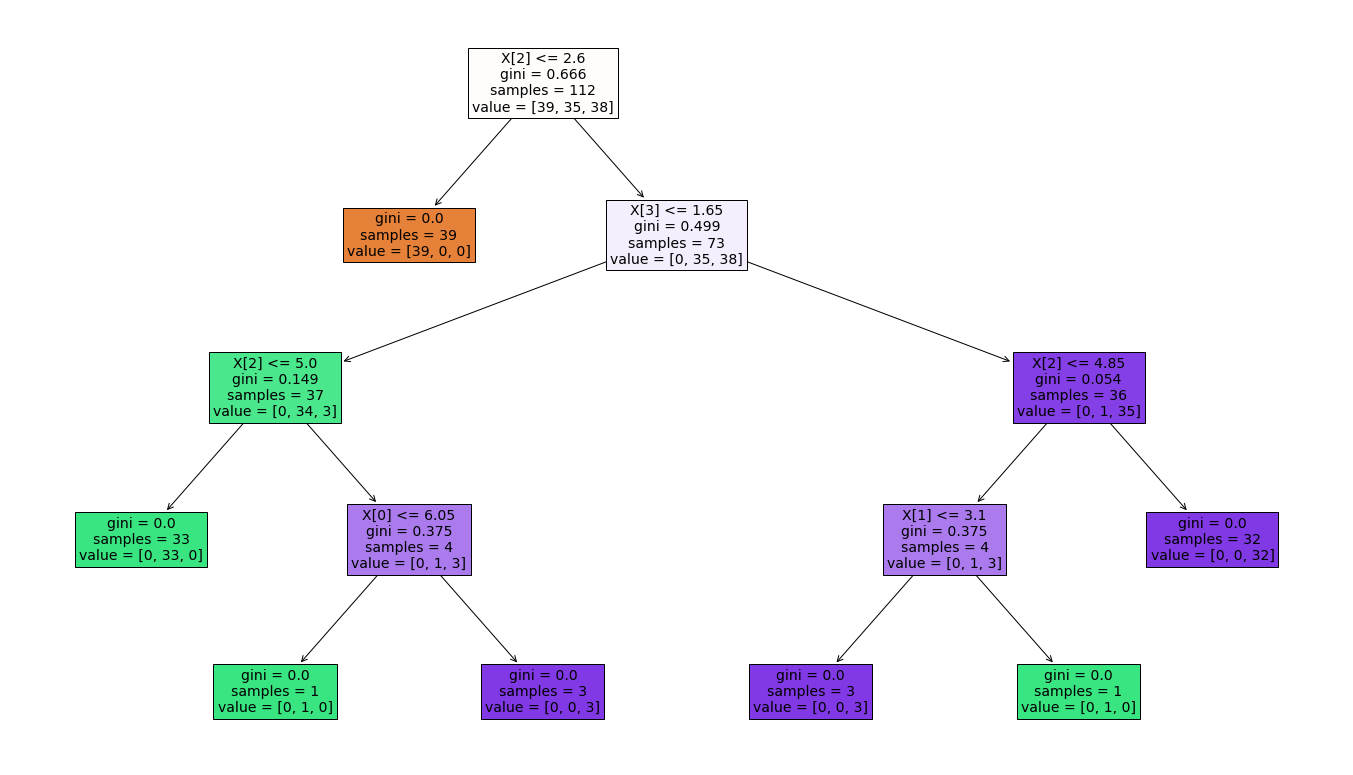

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14)

# Decision Tree with Regression

In [32]:
from sklearn import tree

In [33]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

In [34]:
clf = tree.DecisionTreeRegressor()

In [35]:
clf = clf.fit(X, y)

In [36]:
clf.predict([[1, 1]])

array([0.5])